In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [2]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv"
data = pd.read_csv(url)  # Membaca file CSV dan memuatnya sebagai DataFrame
print("Data Sample:")
data.sample(n=10)


Data Sample:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
112,113,Female,38,64,42
120,121,Male,27,67,56
18,19,Male,52,23,29
144,145,Male,25,77,12
70,71,Male,70,49,55
66,67,Female,43,48,50
46,47,Female,50,40,55
113,114,Male,19,64,46
6,7,Female,35,18,6
30,31,Male,60,30,4


In [3]:
# rename the Annual Income (k$)	Spending Score (1-100) column
data.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
data.sample(n=10)


,CustomerID,Gender,Age,Annual_Income,Spending_Score
117,118,Female,49,65,59
112,113,Female,38,64,42
82,83,Male,67,54,41
10,11,Male,67,19,14
181,182,Female,32,97,86
190,191,Female,34,103,23
63,64,Female,54,47,59
89,90,Female,50,58,46
167,168,Female,33,86,95
51,52,Male,33,42,60


In [4]:
# describe data
data.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Check for null values in the dataset
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


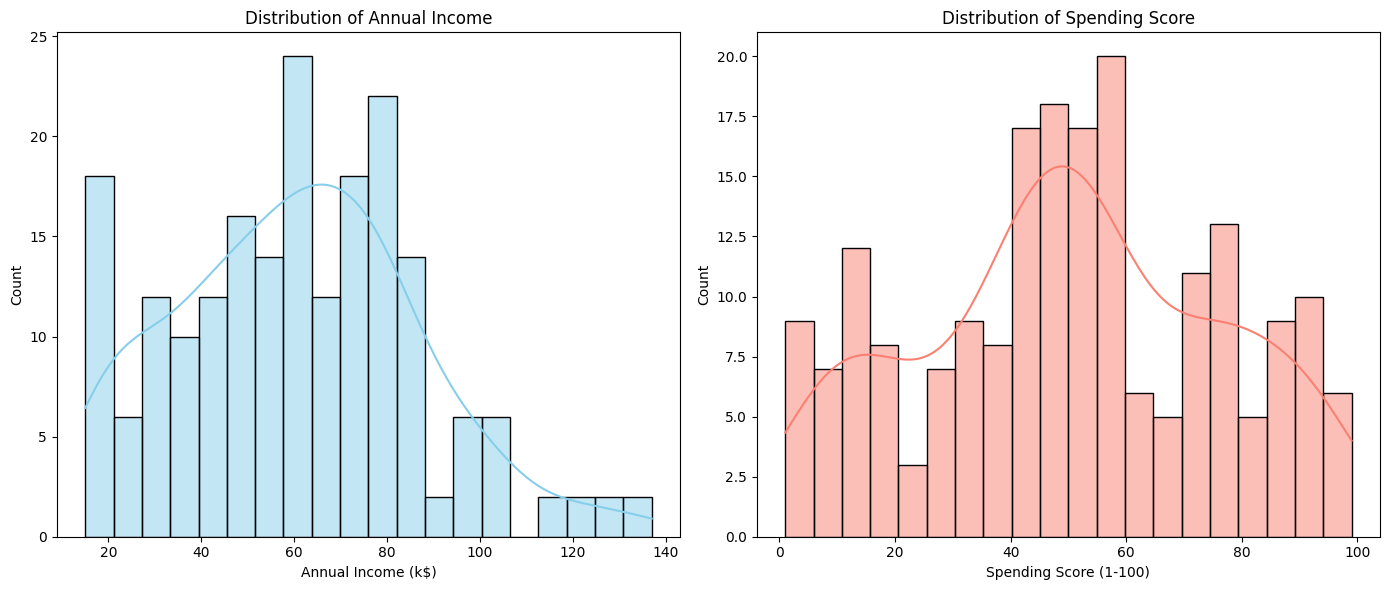

In [6]:
# make an insightful visualization and explain
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting distribution of Annual Income and Spending Score
plt.figure(figsize=(14, 6))

# Annual Income Distribution
plt.subplot(1, 2, 1)
sns.histplot(data['Annual_Income'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Annual Income")
plt.xlabel("Annual Income (k$)")

# Spending Score Distribution
plt.subplot(1, 2, 2)
sns.histplot(data['Spending_Score'], kde=True, bins=20, color='salmon')
plt.title("Distribution of Spending Score")
plt.xlabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()


Annual Income Distribution (left):

The distribution of annual income is roughly uniform, with some variations.
Most customers have incomes between $20k and $ 90
k, with a noticeable peak around the $60k-$70k range.
A small number of customers have significantly higher incomes (above $100k), which could represent a high-income segment that might have different spending habits.

Spending Score Distribution (right):

The spending score distribution is more varied, with noticeable peaks at lower and middle scores.
This suggests there are distinct customer groups: low spenders and moderate to high spenders.
These spending patterns can help in identifying high and low engagement segments for targeted marketing.

<ipython-input-7-6a20637250a8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Spending_Score', data=data, palette="Set2")


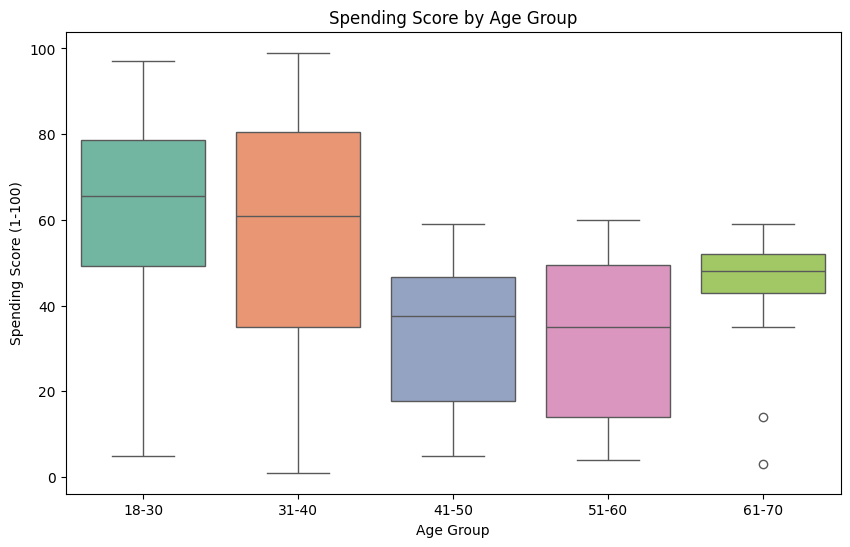

In [7]:
# make an insightful visualization and explain
# Creating Age Groups
data['Age_Group'] = pd.cut(data['Age'], bins=[18, 30, 40, 50, 60, 70], labels=['18-30', '31-40', '41-50', '51-60', '61-70'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Spending_Score', data=data, palette="Set2")
plt.title("Spending Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Spending Score (1-100)")
plt.show()


Box Plot of Spending Score by Age Group:
This plot shows how spending scores vary across different age groups.
18-30 and 31-40 age groups: These groups have the highest median spending scores, indicating younger customers may spend more actively than older groups.
41-50 age group: This group has a noticeably lower median spending score, suggesting that middle-aged customers tend to spend less.
51-60 and 61-70 age groups: The spending scores here are relatively lower and show less variation, which might indicate that older customers have more conservative spending habits.

## Data Preprocessing

For this case study, we only use income and spending score

In [8]:
# create new dataframe that consist only annual income and spending score
data_income_spending = data[['Annual_Income', 'Spending_Score']]
data_income_spending.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [9]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

# Applying StandardScaler to the 'Annual_Income' and 'Spending_Score' columns
scaler = StandardScaler()
data_income_spending_scaled = scaler.fit_transform(data_income_spending)

# Converting the scaled data back into a DataFrame for easier interpretation
data_income_spending_scaled_df = pd.DataFrame(data_income_spending_scaled, columns=['Annual_Income', 'Spending_Score'])
data_income_spending_scaled_df.head()


,Annual_Income,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [12]:
# get stastical information on the new dataset
data_income_spending_scaled_df.describe()

,Annual_Income,Spending_Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

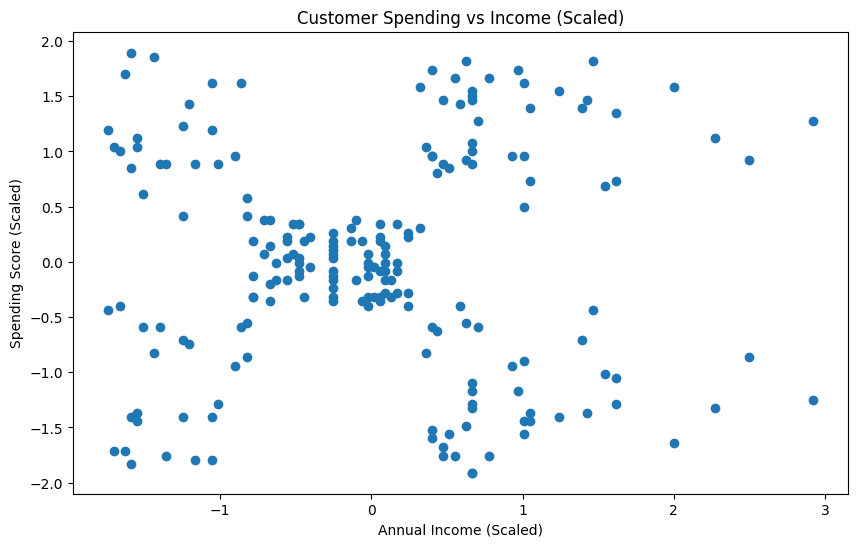

In [14]:
# Visualize the position
plt.figure(figsize=(10, 6))
plt.scatter(data_income_spending_scaled_df['Annual_Income'], data_income_spending_scaled_df['Spending_Score'])
plt.title('Customer Spending vs Income (Scaled)')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.show()

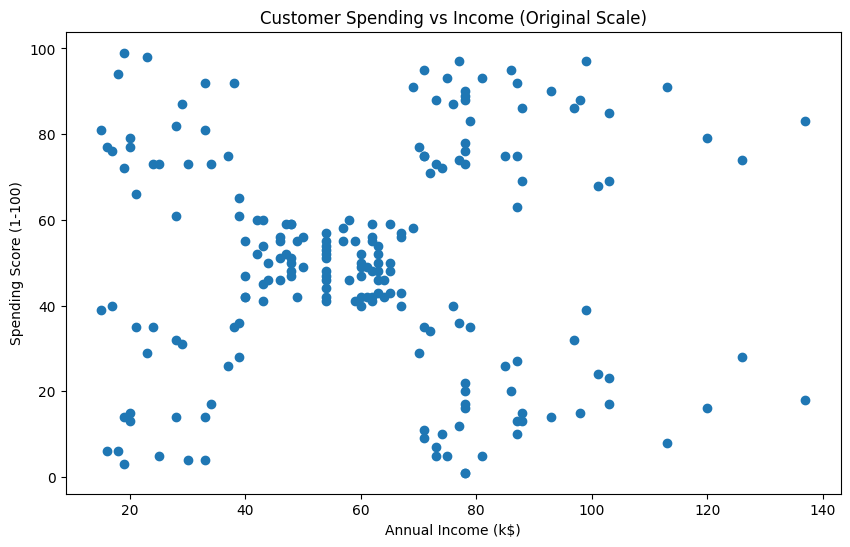

In [17]:
# Visualize the position using the original scale
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual_Income'], data['Spending_Score'])
plt.title('Customer Spending vs Income (Original Scale)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [19]:
# set the parameter for evaluating K
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(data_income_spending_scaled_df)
    inertia.append(kmeans.inertia_)

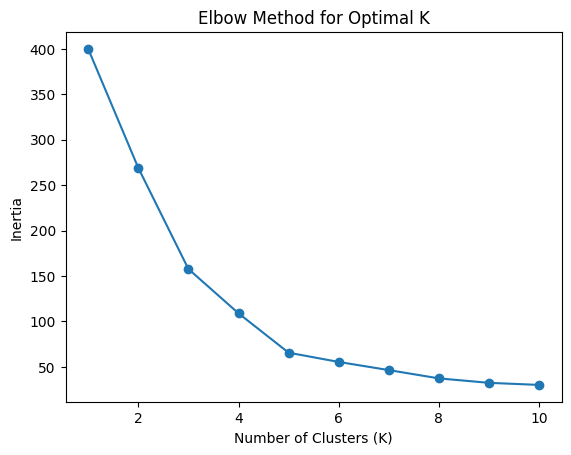

In [20]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [21]:
# using kneelocator to find the elbow/knee
kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")
print(f"Optimal K (Elbow Point): {kl.elbow}")

Optimal K (Elbow Point): 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [23]:
# assign cluster with K-Means algorithm
kmeans = KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
kmeans.fit(data_income_spending_scaled_df)
cluster_labels = kmeans.labels_
cluster_labels

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

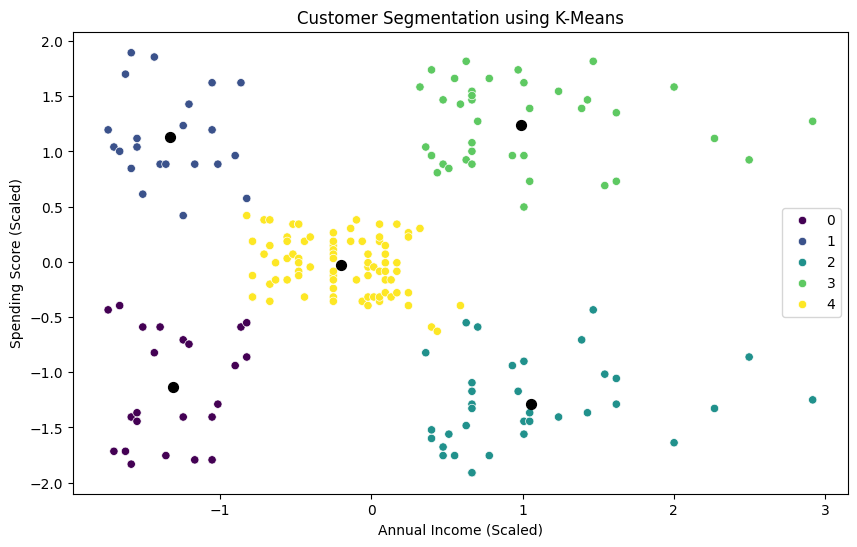

In [29]:
# visualize the result using scater chart
data_income_spending_scaled_df['cluster'] = cluster_labels

# Get the coordinates of the centroids
centroids = kmeans.cluster_centers_

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='cluster', data=data_income_spending_scaled_df, palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='.', s=200, color='Black')
plt.title('Customer Segmentation using K-Means')
plt.xlabel('Annual Income (Scaled)')
plt.ylabel('Spending Score (Scaled)')
plt.legend()
plt.show()

In [31]:
# Inverse transform the scaled data to get the original values
original_data_with_clusters = pd.DataFrame(scaler.inverse_transform(data_income_spending_scaled_df[['Annual_Income', 'Spending_Score']]), columns=['AnnualIncome', 'SpendingScore'])
original_data_with_clusters['Cluster'] = data_income_spending_scaled_df['cluster']
original_data_with_clusters.head()

,AnnualIncome,SpendingScore,Cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [32]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = original_data_with_clusters.groupby('Cluster').agg(
    {'SpendingScore': ['mean', 'std', 'min', 'max'],
     'AnnualIncome': ['mean', 'std', 'min', 'max']}
)

cluster_summary

SpendingScore                        AnnualIncome                   \
                 mean        std   min   max         mean        std   min   
Cluster                                                                      
0           20.913043  13.017167   3.0  40.0    26.304348   7.893811  15.0   
1           79.363636  10.504174  61.0  99.0    25.727273   7.566731  15.0   
2           17.114286   9.952154   1.0  39.0    88.200000  16.399067  70.0   
3           82.128205   9.364489  63.0  97.0    86.538462  16.312485  69.0   
4           49.518519   6.530909  34.0  61.0    55.296296   8.988109  39.0   

                
           max  
Cluster         
0         39.0  
1         39.0  
2        137.0  
3        137.0  
4         76.0

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

<write here>